In [1]:
import pandas as pd
from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory, CoreTriplesFactory

In [2]:
data_dir = '../data/triplets/'

train_df = pd.read_csv(data_dir + 'train_drugbank.tsv', sep='\t')
train_df.head()

,head,relation,tail
0,DB00091,interacts,DB00680
1,DB11730,interacts,DB01229
2,DB00674,interacts,DB09083
3,DB01189,interacts,DB08936
4,DB00656,interacts,DB01193


In [49]:
drug_ids = ["DB01558","DB08813","DB04817", "DB00829","DB00675","DB00316","DB00316","DB00316","DB04817","DB00996","DB01009","DB01009","DB00904","DB01229"]

id1 = train_df[train_df['head'] == drug_ids[0]]
id2 = train_df[train_df['head'] == drug_ids[1]]
# id3 = train_df[train_df['head'] == drug_ids[2]]
# id4 = train_df[train_df['head'] == drug_ids[3]]
# id5 = train_df[train_df['head'] == drug_ids[4]]
# id6 = train_df[train_df['head'] == drug_ids[5]]

train_df_sub = pd.concat([id1, id2, id3, id4, id5, id6])
train_df_sub = train_df_sub.drop_duplicates()
train_df_sub

,head,relation,tail
79,DB01558,interacts,DB06230
3873,DB01558,interacts,DB00185
4761,DB01558,interacts,DB00564
5140,DB01558,interacts,DB06077
7733,DB01558,interacts,DB00714
...,...,...,...
1340495,DB00316,interacts,DB11338
1341476,DB00316,interacts,DB08873
1344114,DB00316,interacts,DB00619
1346351,DB00316,interacts,alcohol


In [ ]:
# entites = set(train_df_sub["head"]).union(set(train_df_sub["tail"]))
# print('Size before:', train_df_sub.shape[0])

# for ent in entites:
#     tmp_df1 = train_df[train_df['head'] == ent]
#     tmp_df2 = train_df[train_df['tail'] == ent]
    
    
#     train_df_sub = pd.concat([train_df_sub, tmp_df1, tmp_df2])
#     train_df_sub = train_df_sub.drop_duplicates()
    
# print('Size after:', train_df_sub.shape[0])


In [50]:
from sklearn.model_selection import train_test_split

train_triplets, test_triplets = train_test_split(train_df_sub, test_size=0.2)
valid_triplets, test_triplets = train_test_split(test_triplets, test_size=0.5)

print(train_triplets.shape[0], valid_triplets.shape[0], test_triplets.shape[0])

4082 510 511


In [51]:
def convert_to_triples_factory(data):
    tf_data = TriplesFactory.from_labeled_triples(
      data[["head", "relation", "tail"]].values,
      create_inverse_triples=False,
      entity_to_id=None,
      relation_to_id=None,
      compact_id=False 
    )
    print(tf_data)  
    return tf_data

tf_train = convert_to_triples_factory(train_triplets.astype(str))
tf_valid = convert_to_triples_factory(valid_triplets.astype(str))
tf_test = convert_to_triples_factory(test_triplets.astype(str))

TriplesFactory(num_entities=1642, num_relations=3, create_inverse_triples=False, num_triples=4082)
TriplesFactory(num_entities=447, num_relations=1, create_inverse_triples=False, num_triples=510)
TriplesFactory(num_entities=450, num_relations=3, create_inverse_triples=False, num_triples=511)


In [52]:
result = pipeline(
    training=tf_train,
    testing=tf_test,
    validation=tf_valid,
    model='transe',
    epochs=100,
    device='gpu',
    optimizer='Adam',
)

INFO:pykeen.pipeline.api:Using device: gpu


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/16 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=512.


Evaluating on cuda:0:   0%|          | 0.00/511 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

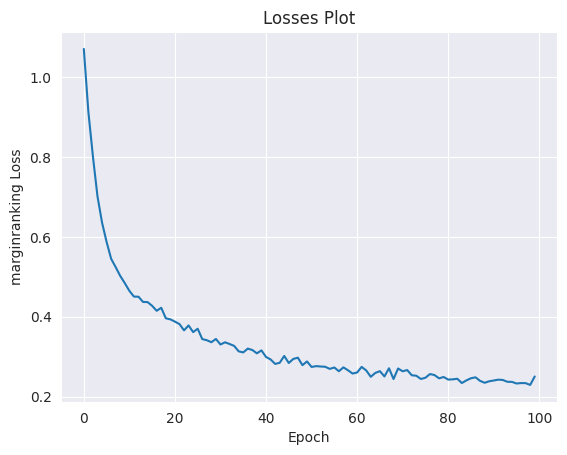

In [53]:
result.plot_losses()

In [48]:
print('Hits@10:', result.get_metric('hits@10'))
print('MRR:', result.get_metric('mrr'))

Hits@10: 0.00684931506849315
MRR: 0.0044159963726997375
